In [180]:
import numpy as np
import tensorflow as tf

In [181]:
x: tf.Tensor = tf.constant([[1, 2, 3], [4, 5, 6]], dtype=tf.int32)
print(x)
x: str = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)
tf.Tensor(
[[ 0.74002737]
 [-0.8082007 ]
 [-0.6456267 ]], shape=(3, 1), dtype=float32)


In [182]:
x = np.ones(shape=(2, 2))
print(x)
x[0, 0] = 0
x[0, 1] = 123
print(x)
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
v.assign(tf.ones(shape=(3, 1)))
print(v)
v.assign_add(tf.ones(shape=(3, 1)))
print(v)

[[1. 1.]
 [1. 1.]]
[[  0. 123.]
 [  1.   1.]]
<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[2.],
       [2.],
       [2.]], dtype=float32)>


In [183]:
input_var = tf.Variable(initial_value=3.)  # Shape 0
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
# Tính đạo hàm riêng của result theo input_var
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


In [184]:
# Xét 1 ví dụ hàm có nhiều biến đầu vào
input_vars = tf.Variable(initial_value=[1., 2., 3., 4.])  # Shape 1
with tf.GradientTape() as tape:
    # Tính giá trị hàm số
    result = tf.abs(input_vars)
# Tính đạo hàm riêng của result theo input_vars
gradients = tape.gradient(result, input_vars)
print(gradients)

tf.Tensor([1. 1. 1. 1.], shape=(4,), dtype=float32)


In [185]:
# Tính gradient của hàm 3x + 2y
x = tf.Variable(initial_value=3.)
y = tf.Variable(initial_value=2.)
with tf.GradientTape() as tape:
    result = 11 * x * x + 12 * y
gradients = tape.gradient(result, [x, y])
print("Gradient with respect to x:", gradients[0].numpy())
print("Gradient with respect to y:", gradients[1].numpy())

Gradient with respect to x: 66.0
Gradient with respect to y: 12.0


In [186]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


In [187]:
# Tính đạo hàm bậc 2 của hàm số y = x^2 + 2x + 1
x = tf.Variable(initial_value=123.)
with tf.GradientTape() as tape_1:
    with tf.GradientTape() as tape_2:
        y = x * x + 2 * x + 1
    # Tính đạo hàm bậc nhất của y theo x
    dy_dx = tape_2.gradient(y, x)
    print(dy_dx)
# Tính đạo hàm bậc 2 của y theo x
d2y_dx2 = tape_1.gradient(dy_dx, x)
print(d2y_dx2)

tf.Tensor(248.0, shape=(), dtype=float32)
tf.Tensor(2.0, shape=(), dtype=float32)


[[ 0.5980911   3.4948206 ]
 [-0.25203276  2.6254244 ]
 [ 1.942856    3.9756448 ]
 ...
 [ 1.1120762  -1.6458672 ]
 [ 2.182718   -0.57500803]
 [ 3.6377957  -0.0578517 ]]
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [1.]
 [1.]]


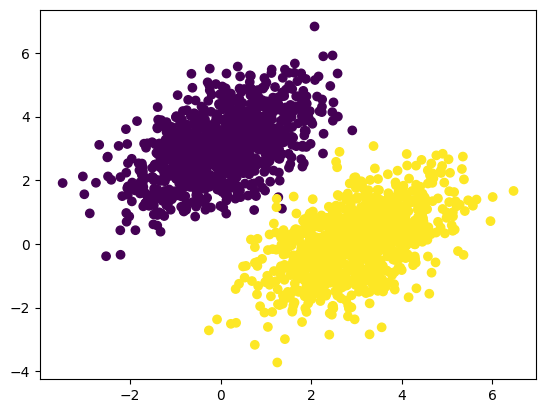

In [188]:
number_of_sample_per_class = 1000

negative_samples = np.random.multivariate_normal(mean=[0, 3], cov=[[1, 0.5], [0.5, 1]], size=number_of_sample_per_class)

positive_samples = np.random.multivariate_normal(mean=[3, 0], cov=[[1, 0.5], [0.5, 1]], size=number_of_sample_per_class)

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

targets = np.vstack((np.zeros((number_of_sample_per_class, 1), dtype="float32"),
                     np.ones((number_of_sample_per_class, 1), dtype="float32")))
import matplotlib.pyplot as plt

print(inputs)
print(targets)
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [193]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))
learning_rate = 0.1

def model(input: tf.Tensor) -> tf.Tensor:
    return tf.matmul(input, W) + b


def square_loss(target, predictions):
    per_sample_losses = tf.square(target - predictions)
    return tf.reduce_mean(per_sample_losses)



def training(inputs, target):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(target, predictions)
    gradloss_wrt_W, gradloss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(learning_rate * gradloss_wrt_W)
    b.assign_sub(learning_rate * gradloss_wrt_b)
    return loss

for step in range(10000):
    loss = training(inputs, targets)
    print("Loss at step {:03d}: {:.3f}".format(step, loss))

Loss at step 000: 6.977
Loss at step 001: 1.092
Loss at step 002: 0.304
Loss at step 003: 0.172
Loss at step 004: 0.143
Loss at step 005: 0.130
Loss at step 006: 0.120
Loss at step 007: 0.112
Loss at step 008: 0.104
Loss at step 009: 0.097
Loss at step 010: 0.091
Loss at step 011: 0.085
Loss at step 012: 0.080
Loss at step 013: 0.075
Loss at step 014: 0.071
Loss at step 015: 0.067
Loss at step 016: 0.063
Loss at step 017: 0.060
Loss at step 018: 0.056
Loss at step 019: 0.054
Loss at step 020: 0.051
Loss at step 021: 0.049
Loss at step 022: 0.047
Loss at step 023: 0.045
Loss at step 024: 0.043
Loss at step 025: 0.042
Loss at step 026: 0.040
Loss at step 027: 0.039
Loss at step 028: 0.038
Loss at step 029: 0.036
Loss at step 030: 0.035
Loss at step 031: 0.034
Loss at step 032: 0.034
Loss at step 033: 0.033
Loss at step 034: 0.032
Loss at step 035: 0.032
Loss at step 036: 0.031
Loss at step 037: 0.030
Loss at step 038: 0.030
Loss at step 039: 0.030
Loss at step 040: 0.029
Loss at step 041

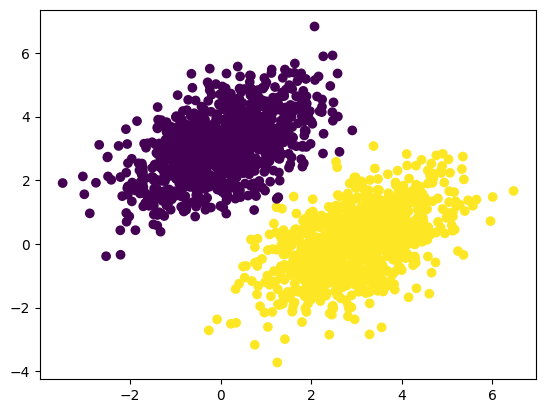

In [194]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

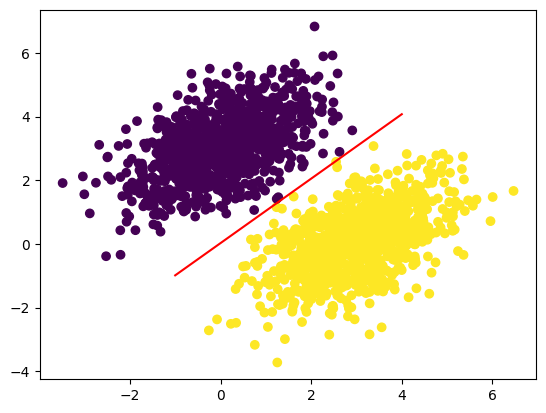

In [195]:
x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

In [209]:
from tensorflow import keras 
class SimpleDense(keras.layers.Layer):
    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation
    def build(self, input_shape):
        # Giả sử input có shape là (2,3) thì input_dim = 3 và self.units = 4
        # => self.W sẽ có shape là (3,4), self.b sẽ có shape là (4,)
        input_dim = input_shape[-1]
        self.W = self.add_weight(name="W",
                                 shape=(input_dim, self.units),
                                 initializer="random_normal",
                                 trainable=True)
        self.b = self.add_weight(name="b",
                                 shape=(self.units,),
                                 initializer="zeros",
                                 trainable=True)
    def call(self, inputs):
        # Tính output của layer với input là inputs
        # Output sẽ có shape (2,4) nếu inputs có shape (2,3)
        # b có shape (4,) sẽ được broadcast với inputs để output có shape (2,4)
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            # Áp dụng hàm kích hoạt activation lên output
            y = self.activation(y)
        return y
my_dense = SimpleDense(units=4, activation=tf.nn.relu)
input_tensor = tf.constant([[1],
                            [2], 
                            [3]], dtype=tf.float32)
print(input_tensor.shape)
output_tensor = my_dense(input_tensor)
print(output_tensor.numpy())
print(output_tensor.shape)

(3, 1)
[[0.04394306 0.         0.00767961 0.02565353]
 [0.08788612 0.         0.01535922 0.05130706]
 [0.13182919 0.         0.02303883 0.07696059]]
(3, 4)
